In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [2]:
from tensorflow.keras.layers import Dense, Activation, Conv2D,Conv1D, Flatten,MaxPooling2D,BatchNormalization,Lambda, AveragePooling2D, MaxPooling1D
import tensorflow.keras.backend as K
from tensorflow.keras.layers import LSTM,Input,Bidirectional,Dense, Conv1D,MaxPooling1D,Flatten,Dropout,Input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras

In [3]:
df_X = pd.read_csv('dataset/train_features.csv')
df_y = pd.read_csv('dataset/train_target.csv')

In [4]:
def data_processing(data_frame,feature_list,conc_list=list()):
    for feature in feature_list:
        conc_list.append(np.asarray(data_frame[feature]).reshape(-1,375,1))
    conc_array = np.concatenate(conc_list,axis=2)
    array = conc_array.transpose(0,1,2)
    return array

In [5]:
data = data_processing(df_X,['S1','S2','S3','S4'])

In [6]:
y = df_y.drop(['id','X','Y','M'],axis=1)
y_numpy = y.to_numpy()
y_list = y_numpy.tolist()

In [7]:
x_array = data
y_array = y_list
train_test_index = int(len(x_array)*0.8)
zip_list = list(zip(x_array,y_array))
random.shuffle(zip_list)
x_array,y_array = zip(*zip_list)
x_train,y_train = np.array(x_array[0:train_test_index]),np.array(y_array[0:train_test_index])
x_test,y_test = np.array(x_array[train_test_index:]),np.array(y_array[train_test_index:])

In [8]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = Scaler.fit_transform(y_train)
y_test_scaled = Scaler.fit_transform(y_test)
y_train_scaled

array([[0.25],
       [0.  ],
       [1.  ],
       ...,
       [0.  ],
       [0.  ],
       [0.5 ]])

In [9]:
model= Sequential(
    [
        Input(shape=(x_train.shape[1],x_train.shape[2])),
        # Use a Rescaling layer to make sure input values are in the [0, 1] range.
        # The original images have shape (28, 28), so we reshape them to (28, 28, 1)
        # Follow-up with a classic small convnet
        Conv1D(32, 2, activation="relu"),
        BatchNormalization(),
        MaxPooling1D(3),
        Conv1D(32,2, activation="relu"),
        MaxPooling1D(2),
        Conv1D(32,2, activation="relu"),
        Flatten(),
        Dense(64, activation="relu"),
        Dense(16, activation="relu"),
        Dense(1,activation='sigmoid')
    ]
)

In [10]:
def my_loss(y_true, y_pred):
    return K.mean(K.square(y_true-y_pred))/2e+04

In [11]:
model.compile(loss=my_loss,optimizer='adam',metrics=['mean_absolute_error'])

In [12]:
from keras import callbacks
early_stopping = callbacks.EarlyStopping(monitor ="val_mean_absolute_error", 
                                        mode ="min", patience = 50, 
                                        restore_best_weights = True)

In [13]:
history = model.fit(x_train,y_train,validation_split=0.2,epochs=500,callbacks=[early_stopping])

Epoch 1/500
56/56 [==============================] - 5s 35ms/step - loss: 2.0030e-06 - mean_absolute_error: 0.1671 - val_loss: 1.9827e-06 - val_mean_absolute_error: 0.1718
Epoch 2/500
56/56 [==============================] - 1s 13ms/step - loss: 5.1272e-07 - mean_absolute_error: 0.0819 - val_loss: 8.9494e-07 - val_mean_absolute_error: 0.1144
Epoch 3/500
56/56 [==============================] - 1s 13ms/step - loss: 3.8070e-07 - mean_absolute_error: 0.0689 - val_loss: 5.2381e-07 - val_mean_absolute_error: 0.0867
Epoch 4/500
56/56 [==============================] - 1s 13ms/step - loss: 2.5421e-07 - mean_absolute_error: 0.0561 - val_loss: 3.6336e-07 - val_mean_absolute_error: 0.0725
Epoch 5/500
56/56 [==============================] - 1s 13ms/step - loss: 3.0029e-07 - mean_absolute_error: 0.0611 - val_loss: 1.5601e-07 - val_mean_absolute_error: 0.0454
Epoch 6/500
56/56 [==============================] - 1s 13ms/step - loss: 2.0426e-07 - mean_absolute_error: 0.0506 - val_loss: 1.3493e-07 - 

56/56 [==============================] - 1s 14ms/step - loss: 1.1061e-07 - mean_absolute_error: 0.0352 - val_loss: 5.9188e-08 - val_mean_absolute_error: 0.0265
Epoch 49/500
56/56 [==============================] - 1s 16ms/step - loss: 7.8964e-08 - mean_absolute_error: 0.0303 - val_loss: 5.5012e-08 - val_mean_absolute_error: 0.0249
Epoch 50/500
56/56 [==============================] - 1s 17ms/step - loss: 1.0625e-07 - mean_absolute_error: 0.0354 - val_loss: 6.4932e-08 - val_mean_absolute_error: 0.0278
Epoch 51/500
56/56 [==============================] - 1s 17ms/step - loss: 1.2338e-07 - mean_absolute_error: 0.0383 - val_loss: 1.3088e-07 - val_mean_absolute_error: 0.0377
Epoch 52/500
56/56 [==============================] - 1s 18ms/step - loss: 1.1094e-07 - mean_absolute_error: 0.0346 - val_loss: 5.8253e-08 - val_mean_absolute_error: 0.0256
Epoch 53/500
56/56 [==============================] - 1s 17ms/step - loss: 1.0452e-07 - mean_absolute_error: 0.0353 - val_loss: 6.1103e-08 - val_mea

56/56 [==============================] - 1s 25ms/step - loss: 9.3268e-08 - mean_absolute_error: 0.0313 - val_loss: 4.6793e-08 - val_mean_absolute_error: 0.0229
Epoch 96/500
56/56 [==============================] - 1s 24ms/step - loss: 1.0973e-07 - mean_absolute_error: 0.0351 - val_loss: 5.7186e-08 - val_mean_absolute_error: 0.0264
Epoch 97/500
56/56 [==============================] - 1s 24ms/step - loss: 1.1689e-07 - mean_absolute_error: 0.0370 - val_loss: 1.3607e-07 - val_mean_absolute_error: 0.0424
Epoch 98/500
56/56 [==============================] - 1s 25ms/step - loss: 1.3139e-07 - mean_absolute_error: 0.0380 - val_loss: 4.1713e-08 - val_mean_absolute_error: 0.0216
Epoch 99/500
56/56 [==============================] - 1s 25ms/step - loss: 7.9724e-08 - mean_absolute_error: 0.0292 - val_loss: 5.4003e-08 - val_mean_absolute_error: 0.0246
Epoch 100/500
56/56 [==============================] - 1s 24ms/step - loss: 9.2153e-08 - mean_absolute_error: 0.0323 - val_loss: 4.1235e-08 - val_me

56/56 [==============================] - 1s 14ms/step - loss: 9.8012e-08 - mean_absolute_error: 0.0305 - val_loss: 3.5575e-08 - val_mean_absolute_error: 0.0197
Epoch 143/500
56/56 [==============================] - 1s 14ms/step - loss: 1.3196e-07 - mean_absolute_error: 0.0363 - val_loss: 4.0522e-08 - val_mean_absolute_error: 0.0211
Epoch 144/500
56/56 [==============================] - 1s 13ms/step - loss: 8.6655e-08 - mean_absolute_error: 0.0288 - val_loss: 4.6206e-08 - val_mean_absolute_error: 0.0224
Epoch 145/500
56/56 [==============================] - 1s 13ms/step - loss: 8.7408e-08 - mean_absolute_error: 0.0292 - val_loss: 3.5385e-08 - val_mean_absolute_error: 0.0202
Epoch 146/500
56/56 [==============================] - 1s 14ms/step - loss: 4.6201e-08 - mean_absolute_error: 0.0222 - val_loss: 3.2779e-08 - val_mean_absolute_error: 0.0191
Epoch 147/500
56/56 [==============================] - 1s 13ms/step - loss: 7.0780e-08 - mean_absolute_error: 0.0266 - val_loss: 5.1683e-08 - va

56/56 [==============================] - 1s 14ms/step - loss: 4.5039e-08 - mean_absolute_error: 0.0210 - val_loss: 3.0762e-08 - val_mean_absolute_error: 0.0181
Epoch 190/500
56/56 [==============================] - 1s 14ms/step - loss: 6.5625e-08 - mean_absolute_error: 0.0266 - val_loss: 4.2112e-08 - val_mean_absolute_error: 0.0217
Epoch 191/500
56/56 [==============================] - 1s 14ms/step - loss: 9.8304e-08 - mean_absolute_error: 0.0316 - val_loss: 3.1530e-08 - val_mean_absolute_error: 0.0189
Epoch 192/500
56/56 [==============================] - 1s 14ms/step - loss: 7.4157e-08 - mean_absolute_error: 0.0268 - val_loss: 2.8339e-08 - val_mean_absolute_error: 0.0176
Epoch 193/500
56/56 [==============================] - 1s 14ms/step - loss: 5.9128e-08 - mean_absolute_error: 0.0251 - val_loss: 2.8776e-08 - val_mean_absolute_error: 0.0175
Epoch 194/500
56/56 [==============================] - 1s 14ms/step - loss: 7.8167e-08 - mean_absolute_error: 0.0269 - val_loss: 4.0936e-08 - va

56/56 [==============================] - 1s 18ms/step - loss: 5.9120e-08 - mean_absolute_error: 0.0234 - val_loss: 3.5245e-08 - val_mean_absolute_error: 0.0193
Epoch 237/500
56/56 [==============================] - 1s 12ms/step - loss: 5.9591e-08 - mean_absolute_error: 0.0240 - val_loss: 3.8704e-08 - val_mean_absolute_error: 0.0216
Epoch 238/500
56/56 [==============================] - 1s 15ms/step - loss: 8.2992e-08 - mean_absolute_error: 0.0279 - val_loss: 3.1677e-08 - val_mean_absolute_error: 0.0183
Epoch 239/500
56/56 [==============================] - 1s 22ms/step - loss: 8.3200e-08 - mean_absolute_error: 0.0267 - val_loss: 3.4375e-08 - val_mean_absolute_error: 0.0188
Epoch 240/500
56/56 [==============================] - 1s 12ms/step - loss: 8.2548e-08 - mean_absolute_error: 0.0275 - val_loss: 5.3294e-08 - val_mean_absolute_error: 0.0231
Epoch 241/500
56/56 [==============================] - 1s 13ms/step - loss: 1.1565e-07 - mean_absolute_error: 0.0332 - val_loss: 3.1849e-08 - va

<function matplotlib.pyplot.show(close=None, block=None)>

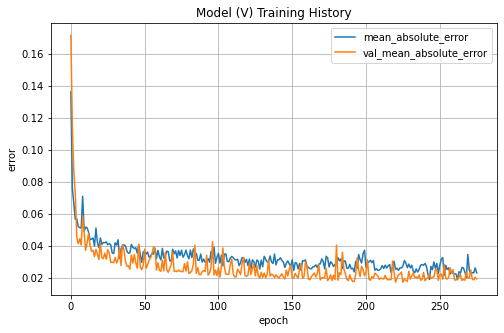

In [15]:
#del history.history["loss"]
#del history.history["val_loss"]
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.xlabel("epoch")
plt.ylabel('error')
plt.title("Model (V) Training History")
plt.grid(True)
plt.show

In [64]:
model.evaluate(x_test,y_test)

18/18 [==============================] - 0s 4ms/step - loss: 1.9235e-08 - mean_absolute_error: 0.0120


[1.9235152137753175e-08, 0.011954731307923794]

In [65]:
ans = model.predict(np.expand_dims(x_test[0],axis=0))

In [68]:
model.save('model/model_v.h5')